# All in one

**Mount to google drive if you use colab**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/deeplearning

Mounted at /content/drive


### Install required packages

In [3]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many


### data preprocess
Extract MFCC from the audio data

In [ ]:
from utils.preprocess import load_audio
from utils.params import Params

params = Params("hparams.yaml", "preprocess")
load_audio(params)

Processing pop


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


Processing metal


100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


Processing disco


100%|██████████| 100/100 [00:35<00:00,  2.82it/s]


Processing blues


100%|██████████| 100/100 [00:35<00:00,  2.79it/s]


Processing reggae


100%|██████████| 100/100 [00:33<00:00,  3.03it/s]


Processing classical


100%|██████████| 100/100 [00:35<00:00,  2.80it/s]


Processing rock


100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


Processing hiphop


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


Processing country


100%|██████████| 100/100 [00:35<00:00,  2.78it/s]


Processing jazz


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


Saving data to data.json


### Function to draw loss chart

In [4]:
import json
import matplotlib.pyplot as plt

def draw_loss_graph(log_path: str):
    with open(log_path, 'r') as f:
        loss = json.load(f)
    train_loss = [l[1]['train_loss'] for l in loss.items()]
    val_loss = [l[1]['val_loss'] for l in loss.items()]
    plt.plot(train_loss, label='train')
    plt.plot(val_loss, label='valid')
    plt.legend()
    plt.show()

### Clear all logs & checkpoints (Optional)

In [8]:
! bash clear.sh

### Train CNN model

In [9]:
! python train.py CNN

Loading data from data.json
100% 219/219 [00:03<00:00, 69.05it/s]
EPOCH 1, train_loss: 1.794929553062544, val_loss: 1.4479122161865234, val_acc: 0.49198931909212285
100% 219/219 [00:02<00:00, 81.94it/s]
EPOCH 2, train_loss: 1.476816866922816, val_loss: 1.2831535339355469, val_acc: 0.5527369826435247
100% 219/219 [00:02<00:00, 81.77it/s]
EPOCH 3, train_loss: 1.3553396086080358, val_loss: 1.187713623046875, val_acc: 0.5921228304405874
100% 219/219 [00:02<00:00, 81.41it/s]
EPOCH 4, train_loss: 1.2446972612940936, val_loss: 1.113301157951355, val_acc: 0.6191588785046729
100% 219/219 [00:02<00:00, 81.25it/s]
EPOCH 5, train_loss: 1.1624729491155081, val_loss: 1.0228041410446167, val_acc: 0.6578771695594126
100% 219/219 [00:02<00:00, 80.45it/s]
EPOCH 6, train_loss: 1.075878068668033, val_loss: 0.9638150930404663, val_acc: 0.6772363150867824
100% 219/219 [00:02<00:00, 81.24it/s]
EPOCH 7, train_loss: 1.021046585446104, val_loss: 0.9279876351356506, val_acc: 0.687917222963952
100% 219/219 [00:02

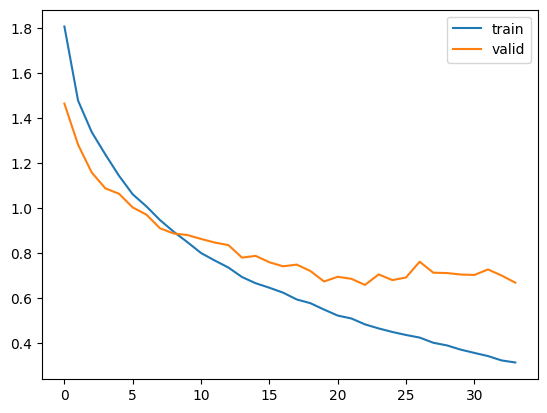

<Figure size 640x480 with 0 Axes>

In [ ]:
draw_loss_graph('logs/cnn.json')

### Train MLP model

In [12]:
! python train.py MLP

Loading data from data.json
100% 219/219 [00:00<00:00, 317.99it/s]
EPOCH 1, train_loss: 2.225592835233846, val_loss: 2.1850690841674805, val_acc: 0.27069425901201605
100% 219/219 [00:00<00:00, 465.56it/s]
EPOCH 2, train_loss: 2.1844280881619236, val_loss: 2.1837363243103027, val_acc: 0.2726969292389853
100% 219/219 [00:00<00:00, 450.25it/s]
EPOCH 3, train_loss: 2.1705835390528407, val_loss: 2.105989694595337, val_acc: 0.35180240320427236
100% 219/219 [00:00<00:00, 432.78it/s]
EPOCH 4, train_loss: 2.148747315100574, val_loss: 2.129204273223877, val_acc: 0.3257676902536716
100% 219/219 [00:00<00:00, 463.60it/s]
EPOCH 5, train_loss: 2.137021654242769, val_loss: 2.0870091915130615, val_acc: 0.369826435246996
100% 219/219 [00:00<00:00, 455.33it/s]
EPOCH 6, train_loss: 2.1184422182380604, val_loss: 2.098594903945923, val_acc: 0.3568090787716956
100% 219/219 [00:00<00:00, 463.08it/s]
EPOCH 7, train_loss: 2.1088475218606653, val_loss: 2.0866730213165283, val_acc: 0.3684913217623498
100% 219/21

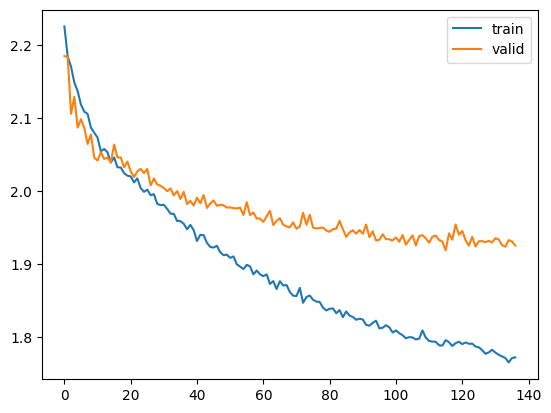

In [13]:
draw_loss_graph('logs/mlp.json')

# LSTM Model

In [14]:
! python train.py LSTM

Loading data from data.json
100% 219/219 [00:00<00:00, 240.44it/s]
EPOCH 1, train_loss: 2.306934292163324, val_loss: 2.273589849472046, val_acc: 0.19959946595460615
100% 219/219 [00:00<00:00, 339.07it/s]
EPOCH 2, train_loss: 2.227475215535645, val_loss: 2.1735482215881348, val_acc: 0.32443257676902537
100% 219/219 [00:00<00:00, 338.40it/s]
EPOCH 3, train_loss: 2.159249975593812, val_loss: 2.121518850326538, val_acc: 0.37149532710280375
100% 219/219 [00:00<00:00, 346.12it/s]
EPOCH 4, train_loss: 2.0993134455943325, val_loss: 2.0688085556030273, val_acc: 0.4062082777036048
100% 219/219 [00:00<00:00, 329.13it/s]
EPOCH 5, train_loss: 2.0595199733699134, val_loss: 2.04307222366333, val_acc: 0.42690253671562084
100% 219/219 [00:00<00:00, 335.04it/s]
EPOCH 6, train_loss: 2.0388710733947404, val_loss: 2.031773567199707, val_acc: 0.4329105473965287
100% 219/219 [00:00<00:00, 335.02it/s]
EPOCH 7, train_loss: 2.0319108634913734, val_loss: 2.023665189743042, val_acc: 0.44225634178905204
100% 219/2

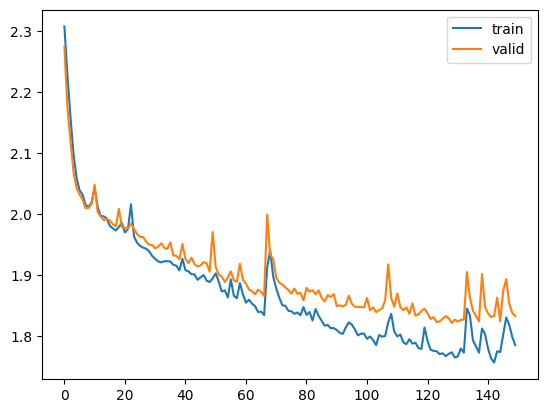

In [15]:
draw_loss_graph('logs/lstm.json')

### Train GRU model

In [10]:
! python train.py GRU

Loading data from data.json
100% 219/219 [00:00<00:00, 238.91it/s]
EPOCH 1, train_loss: 2.3024332064007402, val_loss: 2.270005464553833, val_acc: 0.27369826435246997
100% 219/219 [00:00<00:00, 258.34it/s]
EPOCH 2, train_loss: 2.213602680678761, val_loss: 2.156897783279419, val_acc: 0.2823765020026702
100% 219/219 [00:00<00:00, 252.21it/s]
EPOCH 3, train_loss: 2.145360654647197, val_loss: 2.116245746612549, val_acc: 0.33044058744993327
100% 219/219 [00:00<00:00, 247.00it/s]
EPOCH 4, train_loss: 2.106239189248566, val_loss: 2.078676462173462, val_acc: 0.40720961281708945
100% 219/219 [00:00<00:00, 252.81it/s]
EPOCH 5, train_loss: 2.0734270761866087, val_loss: 2.0518462657928467, val_acc: 0.41321762349799734
100% 219/219 [00:00<00:00, 331.09it/s]
EPOCH 6, train_loss: 2.050030386229174, val_loss: 2.0297389030456543, val_acc: 0.4402536715620828
100% 219/219 [00:00<00:00, 344.35it/s]
EPOCH 7, train_loss: 2.035067037704888, val_loss: 2.0250091552734375, val_acc: 0.4425901201602136
100% 219/21

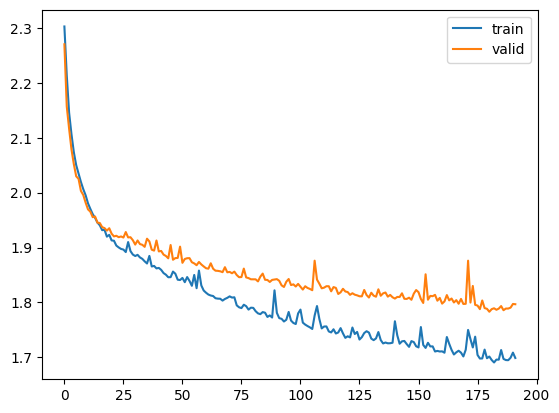

In [11]:
draw_loss_graph('logs/gru.json')